Introduction: The environment of a neighorhood is important to the living quality of people in the neighborhood and the living quality of people the most important factor that determines a good neighborhood. Some neighborhood in large cities like San Francisco and Los Angeles are heavily polluted by people throwing their trash on the ground. This can be caused by the lacking of trash can in the neighborhood. A simple smart trash container can have a huge impact on a city's environment. It can decrease the level of pollution of a neighborhood which can ended up improve people's living quality. 

The Metric: The metric will measure the bestness of Pittsburgh neighborhood based on the ratio between the count of the smart trash containers and the population of the neighborhood. If the ratio is low, it means that the trash can in the neighborhood is less likely to be full and people can have a place to throw out their trash to the trash container instead of throwing it to somewhere else that damages our enviorment. 

Dataset: The small_trash_container.csv file contains the data of the location of the city of Pittsburgh's smart trash containers. There are 8 attribute in this dataset: container_id, receptacle_model_id, assignment_date, group_name, address, city, state, zip, neighborhood, dpw_division, council_district, ward, fire_zone, x, y. The useful attribute for this project will be the neighborhood because the metric need to group the count of the containers by neighborhood. The population.csv contains the population of the Pittsburgh neighborhood in different time period from 2010 to 2020. In this project, the useful attributes is the lastest total population whici is 2020_total_population.

In [91]:
import pandas as pd

p = pd.read_csv("population.csv")
data = pd.read_csv("smart_trash_containers.csv")
data['neighborhood'].unique()
d = dict()
for index, line in data.iterrows():
    if line['neighborhood'] in d and line['neighborhood'] in p['Neighborhood'].unique():
        d[line['neighborhood']] += 1
    else:
        d[line['neighborhood']] = 1
    
print(d)

{'Central Northside': 10, 'Allegheny Center': 7, 'California-Kirkbride': 4, 'Marshall-Shadeland': 15, 'Manchester': 6, 'Perry North': 15, 'Perry South': 5, 'Fineview': 3, 'Allegheny West': 15, 'Troy Hill': 15, 'East Allegheny': 25, 'Brighton Heights': 24, 'Spring Hill-City View': 1, 'Spring Garden': 3, 'Northview Heights': 1, 'Chateau': 2, 'Bluff': 22, 'Garfield': 7, 'Arlington': 1, 'Greenfield': 10, 'East Liberty': 54, 'Morningside': 8, 'Mt. Oliver': 1, 'Carrick': 36, 'Beechview': 8, 'Point Breeze': 6, 'Central Business District': 1, 'Shadyside': 40, 'Bloomfield': 58, 'Brookline': 16, 'South Oakland': 6, 'South Side Flats': 53, 'Allentown': 9, 'South Side Slopes': 8, 'West End': 7, 'Knoxville': 7, 'Beltzhoover': 3, 'Central Oakland': 28, 'Highland Park': 5, 'Larimer': 15, 'South Shore': 1, 'Mount Washington': 25, 'Sheraden': 16, 'Crafton Heights': 7, 'Elliott': 9, 'Westwood': 5, 'Windgap': 1, 'East Carnegie': 1, 'Crawford-Roberts': 16, 'North Shore': 53, 'Strip District': 41, 'Upper H

In [93]:
del_list = []
for name in d:
    if d[name] == 1:
        del_list.append(name)
        
d = dict([(key, val) for key, val in 
           d.items() if key not in del_list])

for index, line in p.iterrows():
    if line['Neighborhood'] in d:
        d[line['Neighborhood']] = d[line['Neighborhood']] / line['2020_Total_Population']

print(d)

{'Central Northside': 0.0033647375504710633, 'Allegheny Center': 0.004933051444679351, 'California-Kirkbride': 0.005641748942172073, 'Marshall-Shadeland': 0.0037073652990608007, 'Manchester': 0.0029542097488921715, 'Perry North': 0.003991484832357637, 'Perry South': 0.0013280212483399733, 'Fineview': 0.002631578947368421, 'Allegheny West': 0.027777777777777776, 'Troy Hill': 0.005671077504725898, 'East Allegheny': 0.013137151865475564, 'Brighton Heights': 0.003377902885292048, 'Spring Garden': 0.003816793893129771, 'Chateau': 0.10526315789473684, 'Bluff': 0.003740224413464808, 'Garfield': 0.0019214932747735384, 'Greenfield': 0.001377220768489189, 'East Liberty': 0.00872797801842573, 'Morningside': 0.0024600246002460025, 'Carrick': 0.003498542274052478, 'Beechview': 0.00105318588730911, 'Point Breeze': 0.0011219147344801795, 'Shadyside': 0.002611477443363583, 'Bloomfield': 0.006693594922100404, 'Brookline': 0.001224833499196203, 'South Oakland': 0.0018023430459597476, 'South Side Flats':

In [94]:
res = pd.DataFrame(list(d.items()), columns = ['Neighborhood', 'SmartContainerRatio']) 
res

,Neighborhood,SmartContainerRatio
0,Central Northside,0.003365
1,Allegheny Center,0.004933
2,California-Kirkbride,0.005642
3,Marshall-Shadeland,0.003707
4,Manchester,0.002954
...,...,...
62,Lincoln-Lemington-Belmar,0.001650
63,Homewood West,0.003115
64,East Hills,0.000692
65,Upper Lawrenceville,0.006266


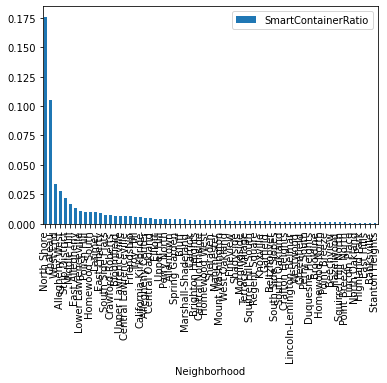

In [95]:
res.sort_values(by = ['SmartContainerRatio'], ascending = False).plot.bar(x = 'Neighborhood', y = 'SmartContainerRatio')

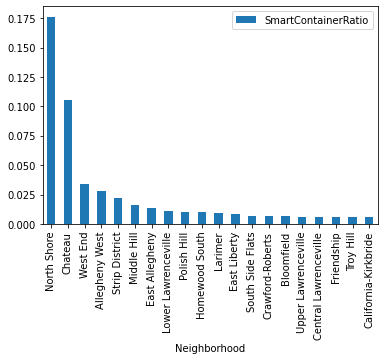

In [96]:
res.sort_values(by = ['SmartContainerRatio'], ascending = False).head(20).plot.bar(x = 'Neighborhood', y = 'SmartContainerRatio')